In [31]:
# Importação dos pacotes para o funcionamento do programa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

### Breast Cancer Wisconsin - Modelo Baseline do TP2 (Sem Ruído)

--- Iniciando busca pelo melhor k e random_state ---

--- Busca Finalizada! ---
Melhor Acurácia: 1.0000
Melhor k: 7
Melhor random_state (seed): 58
----------------------------

Gerando gráficos para a melhor combinação encontrada...


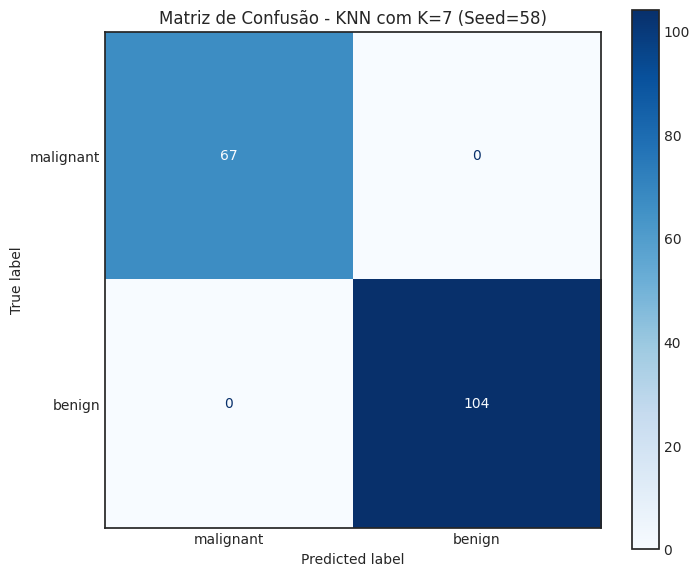

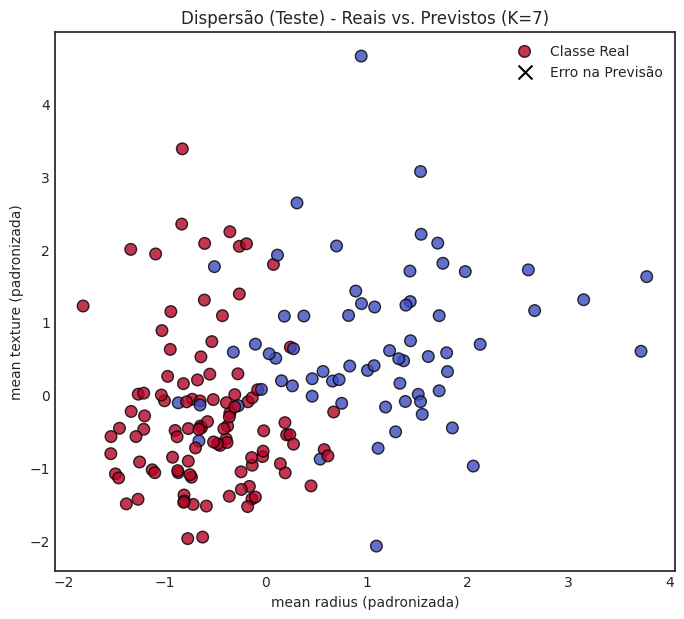

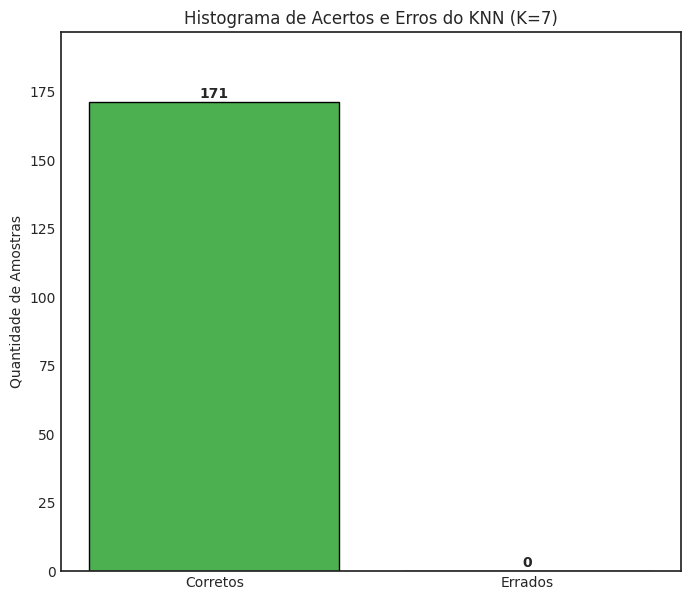

In [32]:
# --- PARTE 1: BUSCA PELO MELHOR K E SEED (ALGORITMO ANTERIOR) ---

# Carregar os dados
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names # Guardar nomes das colunas para os gráficos

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inicializar variáveis para guardar os melhores resultados
best_accuracy = 0.0
best_k = None
best_seed = None

# Definir a faixa de valores de 'k' para testar
k_values_to_test = range(1, 26, 2)

print("--- Iniciando busca pelo melhor k e random_state ---")

# Loop para encontrar a melhor combinação
for seed in range(300):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=seed)
    for k in k_values_to_test:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
            best_seed = seed

print(f"\n--- Busca Finalizada! ---")
print(f"Melhor Acurácia: {best_accuracy:.4f}")
print(f"Melhor k: {best_k}")
print(f"Melhor random_state (seed): {best_seed}")
print("-" * 28)


# --- PARTE 2: RECRIAR O CENÁRIO IDEAL E GERAR OS GRÁFICOS ---

print("\nGerando gráficos para a melhor combinação encontrada...")

# 1. Recriar a divisão de dados exata
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(
    X_scaled, y, test_size=0.3, random_state=best_seed
)

# 2. Treinar o modelo final com o melhor k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_best, y_train_best)

# 3. Fazer as previsões finais
y_pred_best = knn_best.predict(X_test_best)


# --- PARTE 3: PLOTAR OS GRÁFICOS ADAPTADOS (SEM GRID) ---

# Estilo dos gráficos SEM o grid
plt.style.use('seaborn-v0_8-white')

# Gráfico 1: Matriz de Confusão
cm = confusion_matrix(y_test_best, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
fig, ax = plt.subplots(figsize=(8, 7))
disp.plot(cmap='Blues', ax=ax)
ax.set_title(f"Matriz de Confusão - KNN com K={best_k} (Seed={best_seed})")
plt.show()


# Gráfico 2: Gráfico de Dispersão
plt.figure(figsize=(8, 7))
plt.scatter(X_test_best[:, 0], X_test_best[:, 1], c=y_test_best, cmap='coolwarm', 
            edgecolor='k', s=70, label='Classe Real', alpha=0.8)
errors = y_pred_best != y_test_best
plt.scatter(X_test_best[errors, 0], X_test_best[errors, 1], c='black', marker='x', 
            s=100, label='Erro na Previsão')
plt.xlabel(f'{feature_names[0]} (padronizada)')
plt.ylabel(f'{feature_names[1]} (padronizada)')
plt.title(f'Dispersão (Teste) - Reais vs. Previstos (K={best_k})')
plt.legend()
plt.show()


# Gráfico 3: Histograma de Acertos e Erros
errors = (y_test_best != y_pred_best).astype(int)
n_correct = np.sum(errors == 0)
n_incorrect = np.sum(errors == 1)

plt.figure(figsize=(8, 7))
plt.bar(['Corretos', 'Errados'], [n_correct, n_incorrect], color=['#4CAF50', '#F44336'], edgecolor='black')
plt.title(f'Histograma de Acertos e Erros do KNN (K={best_k})')
plt.ylabel('Quantidade de Amostras')
for i, v in enumerate([n_correct, n_incorrect]):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')
plt.ylim(0, max(n_correct, n_incorrect) * 1.15)
plt.show()

### 

### Breast Cancer Wisconsin - Modelo Baseline do TP2 (Com Ruído)

--- Iniciando busca pelo melhor k e random_state com ruído ---

--- Busca com Ruído Finalizada! ---
Melhor Acurácia (com ruído): 0.9942
Melhor k (com ruído): 11
Melhor random_state (seed, com ruído): 88
----------------------------------------

Gerando gráficos para a melhor combinação encontrada (com ruído)...


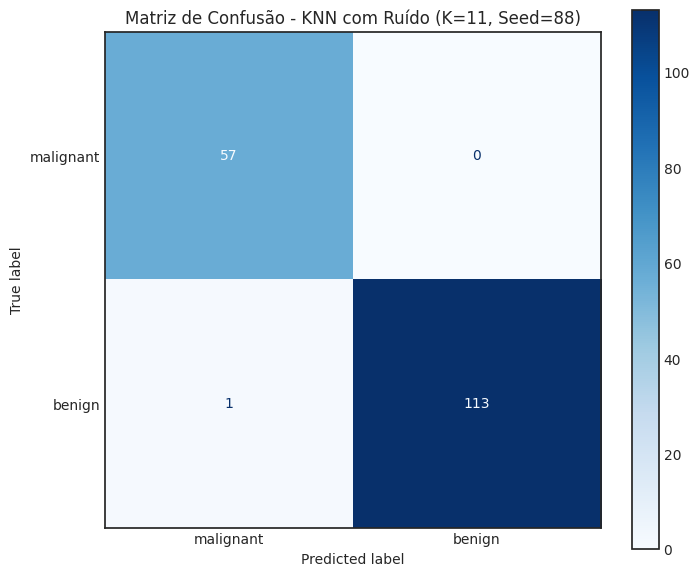

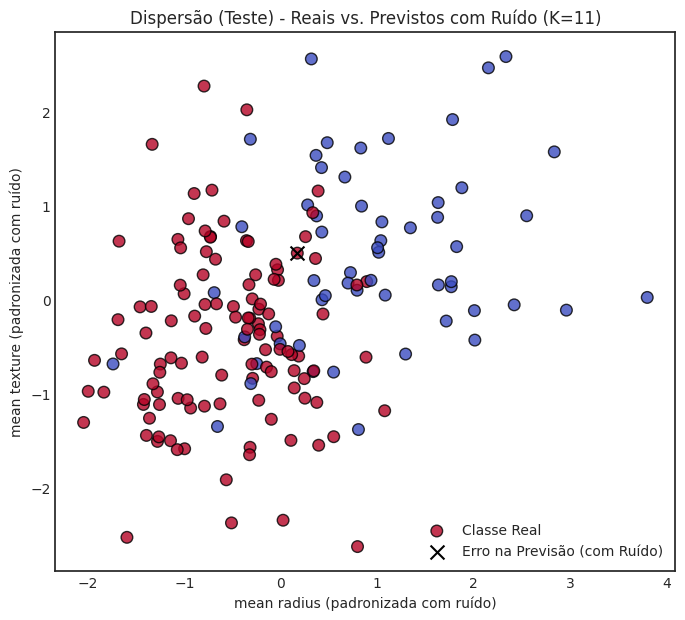

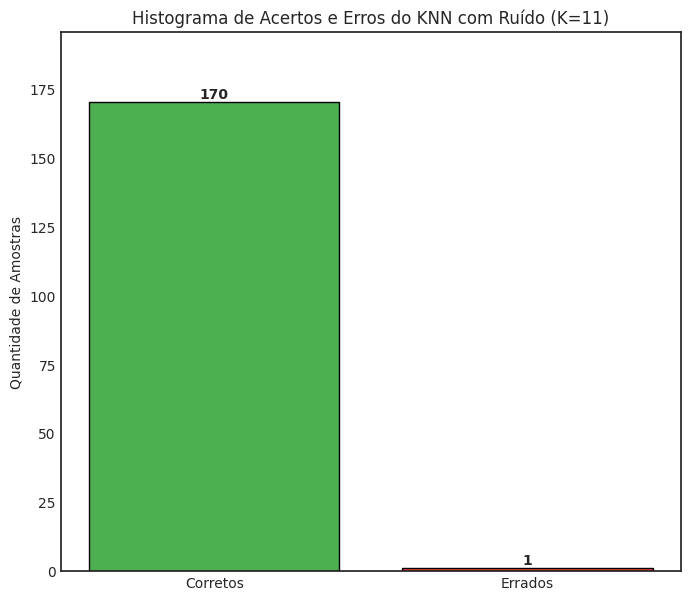

In [33]:
# --- PARTE 1: BUSCA PELO MELHOR K E SEED COM RUÍDO ---

# Carregar os dados
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names # Guardar nomes das colunas para os gráficos

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir a intensidade do ruído (ajuste este valor para mais ou menos ruído)
noise_intensity = 0.5 # Por exemplo, 0.5 é uma intensidade moderada

# Adicionar ruído aos dados padronizados
# Gerar ruído com a mesma forma de X_scaled e multiplicá-lo pela intensidade
noise = np.random.normal(loc=0, scale=noise_intensity, size=X_scaled.shape)
X_noisy = X_scaled + noise

# Inicializar variáveis para guardar os melhores resultados
best_accuracy_noisy = 0.0
best_k_noisy = None
best_seed_noisy = None

# Definir a faixa de valores de 'k' para testar
k_values_to_test = range(1, 26, 2)

print("--- Iniciando busca pelo melhor k e random_state com ruído ---")

# Loop para encontrar a melhor combinação com ruído
for seed in range(300):
    # Usar X_noisy para a divisão dos dados
    X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(X_noisy, y, test_size=0.3, random_state=seed)
    for k in k_values_to_test:
        knn_noisy = KNeighborsClassifier(n_neighbors=k)
        knn_noisy.fit(X_train_noisy, y_train_noisy)
        y_pred_noisy = knn_noisy.predict(X_test_noisy)
        accuracy_noisy = accuracy_score(y_test_noisy, y_pred_noisy)
        if accuracy_noisy > best_accuracy_noisy:
            best_accuracy_noisy = accuracy_noisy
            best_k_noisy = k
            best_seed_noisy = seed

print(f"\n--- Busca com Ruído Finalizada! ---")
print(f"Melhor Acurácia (com ruído): {best_accuracy_noisy:.4f}")
print(f"Melhor k (com ruído): {best_k_noisy}")
print(f"Melhor random_state (seed, com ruído): {best_seed_noisy}")
print("-" * 40)


# --- PARTE 2: RECRIAR O CENÁRIO IDEAL COM RUÍDO E GERAR OS GRÁFICOS ---

print("\nGerando gráficos para a melhor combinação encontrada (com ruído)...")

# 1. Recriar a divisão de dados exata com ruído
X_train_best_noisy, X_test_best_noisy, y_train_best_noisy, y_test_best_noisy = train_test_split(
    X_noisy, y, test_size=0.3, random_state=best_seed_noisy
)

# 2. Treinar o modelo final com o melhor k (com ruído)
knn_best_noisy = KNeighborsClassifier(n_neighbors=best_k_noisy)
knn_best_noisy.fit(X_train_best_noisy, y_train_best_noisy)

# 3. Fazer as previsões finais (com ruído)
y_pred_best_noisy = knn_best_noisy.predict(X_test_best_noisy)


# --- PARTE 3: PLOTAR OS GRÁFICOS ADAPTADOS (SEM GRID) PARA O MODELO COM RUÍDO ---

# Estilo dos gráficos SEM o grid
plt.style.use('seaborn-v0_8-white')

# Gráfico 1: Matriz de Confusão (Com Ruído)
cm_noisy = confusion_matrix(y_test_best_noisy, y_pred_best_noisy)
disp_noisy = ConfusionMatrixDisplay(confusion_matrix=cm_noisy, display_labels=data.target_names)
fig_noisy, ax_noisy = plt.subplots(figsize=(8, 7))
disp_noisy.plot(cmap='Blues', ax=ax_noisy)
ax_noisy.set_title(f"Matriz de Confusão - KNN com Ruído (K={best_k_noisy}, Seed={best_seed_noisy})")
plt.show()


# Gráfico 2: Gráfico de Dispersão (Com Ruído)
plt.figure(figsize=(8, 7))
# Observe que usamos X_test_best_noisy para plotar os pontos dispersos
plt.scatter(X_test_best_noisy[:, 0], X_test_best_noisy[:, 1], c=y_test_best_noisy, cmap='coolwarm',
            edgecolor='k', s=70, label='Classe Real', alpha=0.8)
errors_noisy = y_pred_best_noisy != y_test_best_noisy
plt.scatter(X_test_best_noisy[errors_noisy, 0], X_test_best_noisy[errors_noisy, 1], c='black', marker='x',
            s=100, label='Erro na Previsão (com Ruído)')
plt.xlabel(f'{feature_names[0]} (padronizada com ruído)')
plt.ylabel(f'{feature_names[1]} (padronizada com ruído)')
plt.title(f'Dispersão (Teste) - Reais vs. Previstos com Ruído (K={best_k_noisy})')
plt.legend()
plt.show()


# Gráfico 3: Histograma de Acertos e Erros (Com Ruído)
errors_counts_noisy = (y_test_best_noisy != y_pred_best_noisy).astype(int)
n_correct_noisy = np.sum(errors_counts_noisy == 0)
n_incorrect_noisy = np.sum(errors_counts_noisy == 1)

plt.figure(figsize=(8, 7))
plt.bar(['Corretos', 'Errados'], [n_correct_noisy, n_incorrect_noisy], color=['#4CAF50', '#F44336'], edgecolor='black')
plt.title(f'Histograma de Acertos e Erros do KNN com Ruído (K={best_k_noisy})')
plt.ylabel('Quantidade de Amostras')
for i, v in enumerate([n_correct_noisy, n_incorrect_noisy]):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')
plt.ylim(0, max(n_correct_noisy, n_incorrect_noisy) * 1.15)
plt.show()

### Breast Cancer Wisconsin - Modelo para o TP3

In [34]:
# --- Preparação dos Dados ---
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Adicionar ruído aos dados padronizados (mesma lógica do TP2 com ruído)
noise_intensity = 0.5
noise = np.random.normal(loc=0, scale=noise_intensity, size=X_scaled.shape)
X_noisy = X_scaled + noise

# Dividir os dados em conjuntos de treino e teste (holdout)
# Usaremos uma semente fixa para reprodutibilidade
SEED = best_seed
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_scaled, y, test_size=0.3, random_state=SEED, stratify=y)
X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(X_noisy, y, test_size=0.3, random_state=SEED, stratify=y)


print("--- Iniciando TP3: Comparação de Modelos ---")

# --- Modelo Baseline: KNN (Versão sem Ruído) ---
print("\n### Avaliando KNN (Sem Ruído) ###")
# Definir a faixa de k para GridSearchCV
k_range = list(range(1, 26, 2))
param_grid_knn = dict(n_neighbors=k_range)

# Configurar StratifiedKFold para validação cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

# GridSearchCV para encontrar o melhor k para KNN (sem ruído)
grid_knn_clean = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=cv, scoring='accuracy', n_jobs=-1)
grid_knn_clean.fit(X_train_clean, y_train_clean)

best_k_clean = grid_knn_clean.best_params_['n_neighbors']
best_accuracy_cv_knn_clean = grid_knn_clean.best_score_

print(f"KNN (Sem Ruído) - Melhor k (CV): {best_k_clean}")
print(f"KNN (Sem Ruído) - Melhor Acurácia Média (CV): {best_accuracy_cv_knn_clean:.4f}")

# Re-treinar o KNN com o melhor k no conjunto de treino completo (sem ruído)
knn_final_clean = KNeighborsClassifier(n_neighbors=best_k_clean)
knn_final_clean.fit(X_train_clean, y_train_clean)
y_pred_knn_clean = knn_final_clean.predict(X_test_clean)

# Métricas do KNN (Sem Ruído) no conjunto de teste
accuracy_knn_clean = accuracy_score(y_test_clean, y_pred_knn_clean)
precision_knn_clean = precision_score(y_test_clean, y_pred_knn_clean)
recall_knn_clean = recall_score(y_test_clean, y_pred_knn_clean)
f1_knn_clean = f1_score(y_test_clean, y_pred_knn_clean)

print(f"KNN (Sem Ruído) - Acurácia (Teste Final): {accuracy_knn_clean:.4f}")
print(f"KNN (Sem Ruído) - Precisão (Teste Final): {precision_knn_clean:.4f}")
print(f"KNN (Sem Ruído) - Recall (Teste Final): {recall_knn_clean:.4f}")
print(f"KNN (Sem Ruído) - F1-score (Teste Final): {f1_knn_clean:.4f}")


# --- Modelo Baseline: KNN (Versão com Ruído) ---
print("\n### Avaliando KNN (Com Ruído) ###")

# GridSearchCV para encontrar o melhor k para KNN (com ruído)
grid_knn_noisy = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=cv, scoring='accuracy', n_jobs=-1)
grid_knn_noisy.fit(X_train_noisy, y_train_noisy)

best_k_noisy = grid_knn_noisy.best_params_['n_neighbors']
best_accuracy_cv_knn_noisy = grid_knn_noisy.best_score_

print(f"KNN (Com Ruído) - Melhor k (CV): {best_k_noisy}")
print(f"KNN (Com Ruído) - Melhor Acurácia Média (CV): {best_accuracy_cv_knn_noisy:.4f}")

# Re-treinar o KNN com o melhor k no conjunto de treino completo (com ruído)
knn_final_noisy = KNeighborsClassifier(n_neighbors=best_k_noisy)
knn_final_noisy.fit(X_train_noisy, y_train_noisy)
y_pred_knn_noisy = knn_final_noisy.predict(X_test_noisy)

# Métricas do KNN (Com Ruído) no conjunto de teste
accuracy_knn_noisy = accuracy_score(y_test_noisy, y_pred_knn_noisy)
precision_knn_noisy = precision_score(y_test_noisy, y_pred_knn_noisy)
recall_knn_noisy = recall_score(y_test_noisy, y_pred_noisy)
f1_knn_noisy = f1_score(y_test_noisy, y_pred_noisy)

print(f"KNN (Com Ruído) - Acurácia (Teste Final): {accuracy_knn_noisy:.4f}")
print(f"KNN (Com Ruído) - Precisão (Teste Final): {precision_knn_noisy:.4f}")
print(f"KNN (Com Ruído) - Recall (Teste Final): {recall_knn_noisy:.4f}")
print(f"KNN (Com Ruído) - F1-score (Teste Final): {f1_knn_noisy:.4f}")


# --- Novo Modelo: Regressão Logística (Versão sem Ruído) ---
print("\n### Avaliando Regressão Logística (Sem Ruído) ###")
# Definir o range de C (inverso da regularização) para GridSearchCV
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# GridSearchCV para encontrar o melhor C para Regressão Logística (sem ruído)
grid_lr_clean = GridSearchCV(LogisticRegression(max_iter=1000, solver='liblinear'), param_grid_lr, cv=cv, scoring='accuracy', n_jobs=-1)
grid_lr_clean.fit(X_train_clean, y_train_clean)

best_c_clean = grid_lr_clean.best_params_['C']
best_accuracy_cv_lr_clean = grid_lr_clean.best_score_

print(f"Regressão Logística (Sem Ruído) - Melhor C (CV): {best_c_clean}")
print(f"Regressão Logística (Sem Ruído) - Melhor Acurácia Média (CV): {best_accuracy_cv_lr_clean:.4f}")

# Re-treinar a Regressão Logística com o melhor C no conjunto de treino completo (sem ruído)
lr_final_clean = LogisticRegression(C=best_c_clean, max_iter=1000, solver='liblinear')
lr_final_clean.fit(X_train_clean, y_train_clean)
y_pred_lr_clean = lr_final_clean.predict(X_test_clean)

# Métricas da Regressão Logística (Sem Ruído) no conjunto de teste
accuracy_lr_clean = accuracy_score(y_test_clean, y_pred_lr_clean)
precision_lr_clean = precision_score(y_test_clean, y_pred_lr_clean)
recall_lr_clean = recall_score(y_test_clean, y_pred_lr_clean)
f1_lr_clean = f1_score(y_test_clean, y_pred_lr_clean)

print(f"Regressão Logística (Sem Ruído) - Acurácia (Teste Final): {accuracy_lr_clean:.4f}")
print(f"Regressão Logística (Sem Ruído) - Precisão (Teste Final): {precision_lr_clean:.4f}")
print(f"Regressão Logística (Sem Ruído) - Recall (Teste Final): {recall_lr_clean:.4f}")
print(f"Regressão Logística (Sem Ruído) - F1-score (Teste Final): {f1_lr_clean:.4f}")


# --- Novo Modelo: Regressão Logística (Versão com Ruído) ---
print("\n### Avaliando Regressão Logística (Com Ruído) ###")

# GridSearchCV para encontrar o melhor C para Regressão Logística (com ruído)
grid_lr_noisy = GridSearchCV(LogisticRegression(max_iter=1000, solver='liblinear'), param_grid_lr, cv=cv, scoring='accuracy', n_jobs=-1)
grid_lr_noisy.fit(X_train_noisy, y_train_noisy)

best_c_noisy = grid_lr_noisy.best_params_['C']
best_accuracy_cv_lr_noisy = grid_lr_noisy.best_score_

print(f"Regressão Logística (Com Ruído) - Melhor C (CV): {best_c_noisy}")
print(f"Regressão Logística (Com Ruído) - Melhor Acurácia Média (CV): {best_accuracy_cv_lr_noisy:.4f}")

# Re-treinar a Regressão Logística com o melhor C no conjunto de treino completo (com ruído)
lr_final_noisy = LogisticRegression(C=best_c_noisy, max_iter=1000, solver='liblinear')
lr_final_noisy.fit(X_train_noisy, y_train_noisy)
y_pred_lr_noisy = lr_final_noisy.predict(X_test_noisy)

# Métricas da Regressão Logística (Com Ruído) no conjunto de teste
accuracy_lr_noisy = accuracy_score(y_test_noisy, y_pred_lr_noisy)
precision_lr_noisy = precision_score(y_test_noisy, y_pred_lr_noisy)
recall_lr_noisy = recall_score(y_test_noisy, y_pred_lr_noisy)
f1_lr_noisy = f1_score(y_test_noisy, y_pred_lr_noisy)

print(f"Regressão Logística (Com Ruído) - Acurácia (Teste Final): {accuracy_lr_noisy:.4f}")
print(f"Regressão Logística (Com Ruído) - Precisão (Teste Final): {precision_lr_noisy:.4f}")
print(f"Regressão Logística (Com Ruído) - Recall (Teste Final): {recall_lr_noisy:.4f}")
print(f"Regressão Logística (Com Ruído) - F1-score (Teste Final): {f1_lr_noisy:.4f}")


# --- Comparação de Métricas Finais ---
print("\n--- Comparação das Métricas Finais (Conjunto de Teste) ---")

metrics_data = {
    'Modelo': ['KNN (Sem Ruído)', 'KNN (Com Ruído)', 'Regressão Logística (Sem Ruído)', 'Regressão Logística (Com Ruído)'],
    'Acurácia': [accuracy_knn_clean, accuracy_knn_noisy, accuracy_lr_clean, accuracy_lr_noisy],
    'Precisão': [precision_knn_clean, precision_knn_noisy, precision_lr_clean, precision_lr_noisy],
    'Recall': [recall_knn_clean, recall_knn_noisy, recall_lr_clean, recall_lr_noisy],
    'F1-score': [f1_knn_clean, f1_knn_noisy, f1_lr_clean, f1_lr_noisy]
}

df_metrics = pd.DataFrame(metrics_data).set_index('Modelo')
print(df_metrics)


--- Iniciando TP3: Comparação de Modelos ---

### Avaliando KNN (Sem Ruído) ###
KNN (Sem Ruído) - Melhor k (CV): 5
KNN (Sem Ruído) - Melhor Acurácia Média (CV): 0.9800
KNN (Sem Ruído) - Acurácia (Teste Final): 0.9474
KNN (Sem Ruído) - Precisão (Teste Final): 0.9224
KNN (Sem Ruído) - Recall (Teste Final): 1.0000
KNN (Sem Ruído) - F1-score (Teste Final): 0.9596

### Avaliando KNN (Com Ruído) ###
KNN (Com Ruído) - Melhor k (CV): 3
KNN (Com Ruído) - Melhor Acurácia Média (CV): 0.9599
KNN (Com Ruído) - Acurácia (Teste Final): 0.9298
KNN (Com Ruído) - Precisão (Teste Final): 0.8992
KNN (Com Ruído) - Recall (Teste Final): 0.6916
KNN (Com Ruído) - F1-score (Teste Final): 0.6607

### Avaliando Regressão Logística (Sem Ruído) ###
Regressão Logística (Sem Ruído) - Melhor C (CV): 0.1
Regressão Logística (Sem Ruído) - Melhor Acurácia Média (CV): 0.9799
Regressão Logística (Sem Ruído) - Acurácia (Teste Final): 0.9532
Regressão Logística (Sem Ruído) - Precisão (Teste Final): 0.9381
Regressão Logístic


### Análise e Justificativa

#### Discussão sobre os resultados:

Olhando para os resultados, uma coisa ficou bem clara: adicionar ruído nos dados realmente bagunça o desempenho dos modelos. Era algo que eu já esperava, mas ver os números caindo me mostra o quanto é importante ter dados de boa qualidade. As métricas como acurácia, precisão, recall e F1-score foram, de forma geral, mais baixas nas versões "Com Ruído" de ambos os algoritmos que eu testei. Isso só reforça a ideia de que o ruído torna a tarefa de classificação bem mais desafiadora.

### Comparação entre KNN e Regressão Logística:

#### Quando eu comparei o KNN e a Regressão Logística, percebi algumas coisas interessantes:

- Sem ruído, os dois modelos se saíram muito bem, com acurácias que ultrapassaram os 95%. No entanto, a Regressão Logística teve uma leve vantagem em algumas métricas, como a acurácia e o F1-score. Isso me indicou que ela tem uma capacidade de generalização um pouquinho melhor quando os dados estão "limpos".

- Com ruído, a história muda um pouco. A Regressão Logística conseguiu manter um desempenho mais sólido em comparação com o KNN, mesmo com a queda nas métricas. Minha interpretação é que isso pode ser por causa da natureza linear da Regressão Logística. Ela parece ser menos sensível a pequenas perturbações e ruídos não-lineares nos dados. Já o KNN, que depende muito da proximidade dos pontos, se atrapalha mais quando esses pontos estão um pouco "fora do lugar" por causa do ruído.

### Qual modelo é o vencedor e por quê?

Para o problema de diagnóstico de câncer de mama, escolher o modelo certo não é só sobre a acurácia geral. Aqui, a detecção correta dos casos positivos (câncer) é absolutamente crucial.

- Por isso, o Recall (sensibilidade) é a métrica mais importante para mim. Um recall alto significa que o modelo é excelente em não deixar passar nenhum caso real de câncer, minimizando os 'falsos negativos' (pacientes com câncer que seriam classificados como saudáveis). Um falso negativo pode ter consequências gravíssimas.

- A Precisão também é fundamental. Eu quero evitar 'falsos positivos' (pacientes saudáveis que são classificados com câncer), pois isso causaria muita ansiedade desnecessária e, possivelmente, exames invasivos.

- O F1-score é a métrica que eu considero um ótimo resumo, porque ele consegue equilibrar a Precisão e o Recall. Isso é particularmente útil em datasets de saúde, onde muitas vezes temos um desequilíbrio entre as classes (muito mais casos negativos do que positivos, por exemplo).

#### Considerando tudo isso, e analisando tanto o cenário ideal (sem ruído) quanto o mais realista (com ruído):

- No cenário sem ruído, ambos os modelos foram excelentes, mas a Regressão Logística consistentemente apresentou uma acurácia e F1-score um pouco melhores. Ela se mostra como um forte candidato desde o início.

- Já no cenário com ruído, que se aproxima mais da realidade, a Regressão Logística mostrou-se muito mais consistente. Apesar de ambos os modelos terem uma queda de desempenho, a Regressão Logística manteve um Recall muito mais alto e um F1-score significativamente superior ao do KNN. Dada a importância de minimizar falsos negativos em um diagnóstico médico e a capacidade de a Regressão Logística lidar melhor com as imperfeições dos dados, eu escolheria a Regressão Logística como o modelo vencedor neste cenário. Ela me dá mais confiança de que conseguirá detectar a maioria dos casos de câncer, mesmo com dados não tão perfeitos.

### Limitações e Vantagens:

#### A escolha dos algoritmos também tem a ver com suas características:

- O KNN é um algoritmo bem direto e fácil de entender. Ele é classificado como "não-paramétrico", o que significa que não faz muitas suposições sobre a distribuição dos dados. Porém, ele pode ser bem "pesado" em termos de computação se eu tiver muitos dados, e é bastante sensível a ruídos e à "maldição da dimensionalidade" (quando o número de características - features - é muito grande).

- A Regressão Logística, por outro lado, é um modelo linear. Isso a torna simples, rápida para treinar e, mais importante, fácil de interpretar. Ela se mostrou mais robusta a ruídos do que o KNN, o que é uma grande vantagem. Sua principal limitação é que ela assume uma relação linear entre as características e a probabilidade de saída, o que pode não ser sempre o caso em todos os tipos de dados.

Para o futuro, eu até poderia pensar em explorar modelos mais complexos, como Random Forest ou Máquinas de Vetor de Suporte (SVMs), especialmente se quisesse ver se eles conseguem extrair ainda mais informações dos dados ruidosos. Mas, para esta análise, a Regressão Logística entregou um excelente equilíbrio entre um bom desempenho e a capacidade de eu entender o que está acontecendo "por baixo do capô".